# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

### Student:
Marcomini Alessandro, 2024286

#### Note: 
I tried my code with different seeds in order to see the correct behaviour of the machine. However, in the end I decided to run the definitive output with my rookie number in order to be coherent with assignation. I believe that some results I obtain in this configuration are different from the most common ones, however it has been an useful exercise for me to observe it and deal with it. 

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.2


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2024286
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [67 55 63 64 64 69 54 50 62 52]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [67 55 63 64 64 69 54 50 62 52]


In [6]:
LABELS = \
['T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot']

In [7]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: ", LABELS[labels[index]])
    return

INPUT:


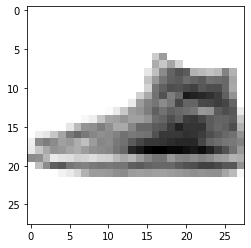

LABEL:  Sneaker
INPUT:


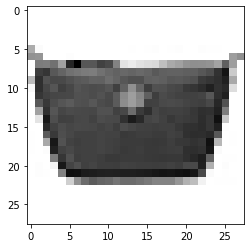

LABEL:  Bag
INPUT:


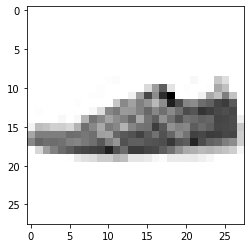

LABEL:  Sneaker


In [8]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [9]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (20,20,), (30,30,20)]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

clf = GridSearchCV(estimator=mlp, param_grid=parameters, cv=5, return_train_score=True)
f = clf.fit(X_train,y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
best_c = clf.best_estimator_
print(best_c,'\n')

print("Score with best parameters:")
best_s1 = clf.best_score_
print(best_s1,'\n')

print("\nAll scores on the grid:")
par = clf.cv_results_['params']
res = clf.cv_results_['mean_test_score']
for i in range(len(par)):
    par[i]['score'] = res[i]
    print(par[i])

RESULTS FOR NN

Best parameters set found:
MLPClassifier(hidden_layer_sizes=(20,), learning_rate_init=0.1, max_iter=250,
              random_state=2024286, solver='sgd') 

Score with best parameters:
0.7949999999999999 


All scores on the grid:
{'hidden_layer_sizes': (10,), 'score': 0.78}
{'hidden_layer_sizes': (20,), 'score': 0.7949999999999999}
{'hidden_layer_sizes': (30,), 'score': 0.7933333333333332}
{'hidden_layer_sizes': (20, 20), 'score': 0.745}
{'hidden_layer_sizes': (30, 30, 20), 'score': 0.6849999999999999}


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [10]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp = best_c

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

clf = GridSearchCV(estimator=mlp, param_grid=parameters, cv=kf, return_train_score=True)
f = clf.fit(X_train,y_train)


print ('RESULTS FOR NN\n')

print("Best parameters set found:")
best_c = clf.best_estimator_
print(best_c,'\n')

print("Score with best parameters:")
best_s1 = clf.best_score_
print(best_s1,'\n')

print("\nAll scores on the grid:")
par = clf.cv_results_['params']
res = clf.cv_results_['mean_test_score']
for i in range(len(par)):
    par[i]['score'] = res[i]
    print(par[i])

/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS FOR NN

Best parameters set found:
MLPClassifier(batch_size=480, hidden_layer_sizes=(20,), learning_rate_init=0.1,
              max_iter=250, random_state=2024286, solver='sgd') 

Score with best parameters:
0.7683333333333333 


All scores on the grid:
{'batch_size': 1, 'score': 0.10666666666666666}
{'batch_size': 32, 'score': 0.7316666666666667}
{'batch_size': 480, 'score': 0.7683333333333333}


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

We can observe that the best solutions involves the use of a single layer or 20 neurons (even though also 30 of them provide a good result) and a standard GD method (mini-batch maximal size). SGD does not provide a good training score for the model under review. A medium-sidez mini-batch (32 elements) and a two-layers model with 20 neurons each provide good performances as well. Trying with different seeds and architectures, I found also a (50,50) NN being quite good but longer to train. The training does not converge for two out of three batches sies: the reason could be linked to unstability and rapid changes in gradient descent.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 0.36 sec

Training MLP of size (20,) ...
Done, training time: 0.69 sec

Training MLP of size (30,) ...
Done, training time: 0.40 sec

Training MLP of size (30, 20) ...
Done, training time: 0.35 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 0.41 sec



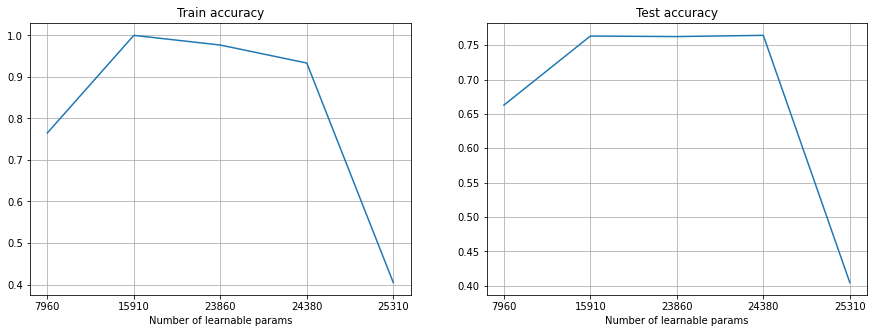

In [11]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (30,20,), (30,30,20)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(hidden_layer_sizes = hl_size, max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
    
    mlp.fit(X_train,y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

For the architectures under review we see that the best results on training set are the ones with a mean parameters number. In particular, a situation reaches a 100% score on the training set. On the other side, we see that a too large amount of parameters damages the network performances, on both tests. We must recall that many parameters lead to risk of overfitting and consequently bad previsions on the test set. A medium number of parameters managanes to provide reasonable results on both tests. A low numeber of parameters instead fails to reach top performances on both datasets, meaning that the structure in not strong enough to fully achieve potentially optimal performances.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


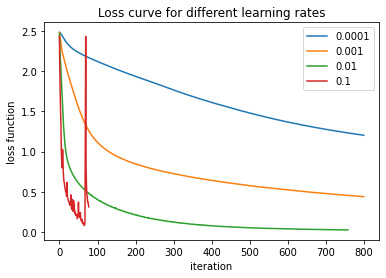

RESULTS FOR NN

Best parameters set found:
0.01 

Score with best parameters:
1.0 

All scores:
{0.0001: 0.6283333333333333, 0.001: 0.87, 0.01: 1.0, 0.1: 0.9066666666666666}


In [12]:
import matplotlib.pyplot as plt
import operator

#lr_list = [0.001, 0.01, 0.1]
lr_list = [10**exp for exp in range(-4,0)]
scores = {}


for lr in lr_list:
    mlp = MLPClassifier(batch_size=480, hidden_layer_sizes=(20,), learning_rate_init=lr,
              max_iter=800, random_state=2024286, solver='sgd')
    f = mlp.fit(X_train,y_train)
    plt.plot(f.loss_curve_, label = '{}'.format(lr))
    scores[lr] = f.score(X_train,y_train)
    
    
plt.legend()
plt.title('Loss curve for different learning rates')
plt.xlabel('iteration')
plt.ylabel('loss function')
plt.show()



print ('RESULTS FOR NN\n')

print("Best parameters set found:")
best_par = max(scores, key=scores.get)
print(best_par, '\n')

print("Score with best parameters:")
best_score = scores[best_par]
print(best_score, '\n')

print("All scores:")
print(scores)

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

The learning curves depicted above show similar trends: a first region with a sudden fall and then a more steady profile till the ending point. In particular, the first descent is more vertical the higher is the learing rate (as we expect: for larger LRs the system evolves faster towards the minima) but we also see that for a too large learning rate (0.1) the stability is deeply compromised, as wee see numerous peaks in the curve. This means that the system fails to actually set in the minimum and keeps on moving in the nearbies, eventually without convergence. On the other hand, little LRs are definitely stable but extremely slow (and loss fucntions still far from the 0 value after several iterations). A good compromise is the 0.01 learning rate, which expresses stability and gets close to zero loss after a reasonable number of iteractions.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.232250


/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


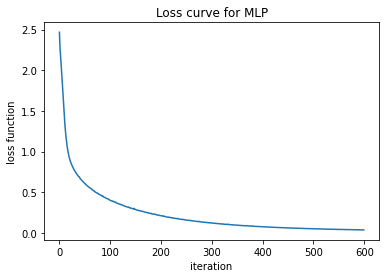

In [13]:
#get training and test error for the best NN model from CV

#from previous cases: we select as best bath size 480, best learining rate 0.01 and best architecture (20,), so:
mlp = MLPClassifier(batch_size=480, hidden_layer_sizes=(20,), learning_rate_init=0.01,
              max_iter=600, random_state=2024286, solver='sgd')

f = mlp.fit(X_train,y_train)
training_error = 1. - f.score(X_train,y_train)
test_error = 1. - f.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.title('Loss curve for MLP')
plt.xlabel('iteration')
plt.ylabel('loss function')
plt.plot(f.loss_curve_)

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [14]:
X = X[permutation]
y = y[permutation]

m_training = 6000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [603 603 625 632 614 601 574 570 572 606]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

/usr/local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(



RESULTS FOR NN

NN training error: 0.063500
NN test error: 0.159389


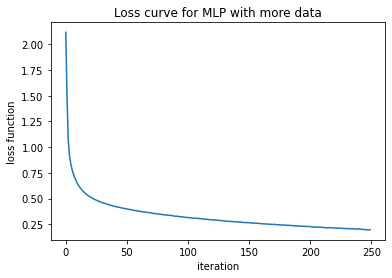

In [15]:
# use best architecture and params from before

large_mlp = MLPClassifier(batch_size=480, hidden_layer_sizes=(20,), learning_rate_init=0.01,
              max_iter=250, random_state=2024286, solver='sgd', verbose = False)

large_f = large_mlp.fit(X_train,y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

training_error = 1. - large_f.score(X_train,y_train)
test_error = 1. - large_f.score(X_test,y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)

plt.title('Loss curve for MLP with more data')
plt.xlabel('iteration')
plt.ylabel('loss function')
plt.plot(large_f.loss_curve_)

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

The first computation achieves a 100% accuracy on the training set while the large fit reaches only a 93.7% score. Recalling that in the second case we have x10 the training data that we used in first place, this is a good enough result. This is proven by the accuracy on the test set: the less trained network only achieves a 77% accuracy on the test data whereas the most trained one acheives a 85% precision. Finally, the learning curves look similar. 

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


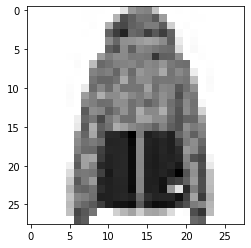

LABEL:  Coat
Misclassified by less-trained NN as: Pullover


In [16]:
NN_prediction = f.predict(X_test)
large_NN_prediction = large_f.predict(X_test)

flag = False
i,index_miss = 0,-1

while flag == False:
    while i <54000:
        if NN_prediction[i] != y_test[i]: 
            if large_NN_prediction[i] == y_test[i]:
                index_miss = i
                flag = True
        i += 1



plot_input(X_test,large_NN_prediction,index_miss)
print('Misclassified by less-trained NN as:', LABELS[NN_prediction[index_miss]])

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


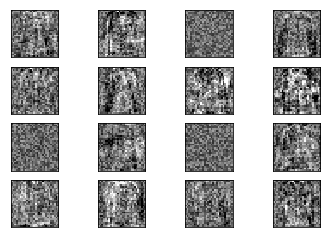

Weights with 6000 data points:


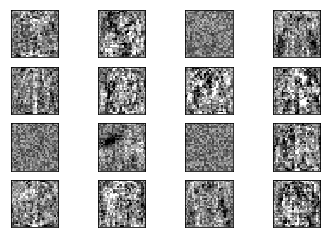

In [17]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 6000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = large_mlp.coefs_[0].min(), large_mlp.coefs_[0].max()
for coef, ax in zip(large_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

Looking at the weights we can notice how the corresponding images in upper-lower parts present some similar details but the second ones seems to apprear more nitid (i.e., bigger contrasts occur between different weights). This can be seen looking at (2,4), (4,2) and (4,4) pictures in the two sets, for examples. On the other hand pictures in (1,3), (3,1) and (3,3) are pretty identical (they look like disturbed noise).

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [18]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = SVC(C=5, gamma=0.005)     #best svm found on previous set of exercises
f = best_SVM.fit(X_train,y_train)

print ('RESULTS FOR SVM')

SVM_training_error =  1. - f.score(X_train,y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1. - f.score(X_test,y_test)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.07040000000000002
Test score SVM:
0.13680000000000003


In [19]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1)

# you can re-use your code from Lab 2

fit = regL2.fit(X_train,y_train)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error = 1-fit.score(X_train,y_train)
test_error = 1-fit.score(X_test,y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.072000
Test error (reg): 0.167600


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

The well-trained NN is the one performing better on the training set, providing a 94% score, slighlty better than the other two algorithms. The performance over the test set, however, tells us that the SVM outperformes the prediction abilities of NN, while LogReg is a still good method, not far from the others' results, but still the worse on those dataset. 